In [83]:
import pandas as pd
import numpy as np
import string
import spacy

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import imread
from wordcloud import wordcloud
%matplotlib inline

In [84]:
data = pd.read_csv("C:\\Users\\hp\\Downloads\\SalaryData_Train.csv")
data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [85]:
data['Salary'].value_counts()

 <=50K    22653
 >50K      7508
Name: Salary, dtype: int64

In [86]:
# Lets do label-Encoding :-

In [87]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [88]:
data['workclass'] = label_encoder.fit_transform(data.workclass)

In [89]:
data['education'] = label_encoder.fit_transform(data.education)

In [90]:
data['maritalstatus'] = label_encoder.fit_transform(data.maritalstatus)

In [91]:
data['occupation'] = label_encoder.fit_transform(data.occupation)

In [92]:
data['relationship'] = label_encoder.fit_transform(data.relationship)

In [93]:
data['race'] = label_encoder.fit_transform(data.race)

In [94]:
data['sex'] = label_encoder.fit_transform(data.sex)

In [95]:
data['native'] = label_encoder.fit_transform(data.native)

In [96]:
data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,<=50K
1,50,4,9,13,2,3,0,4,1,0,0,13,37,<=50K
2,38,2,11,9,0,5,1,4,1,0,0,40,37,<=50K
3,53,2,1,7,2,5,0,2,1,0,0,40,37,<=50K
4,28,2,9,13,2,9,5,2,0,0,0,40,4,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,2,7,12,2,12,5,4,0,0,0,38,37,<=50K
30157,40,2,11,9,2,6,0,4,1,0,0,40,37,>50K
30158,58,2,11,9,6,0,4,4,0,0,0,40,37,<=50K
30159,22,2,11,9,4,0,3,4,1,0,0,20,37,<=50K


In [97]:
# Lets make our data scale free :-

In [98]:
def std_data(i):
    result = (i-i.min())/(i.max()-i.min())
    return result

In [99]:
std_data = std_data(data.iloc[:,:-1])

In [100]:
#std_data['Salary']=data.Salary

In [101]:
std_data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,0.301370,0.833333,0.600000,0.800000,0.666667,0.000000,0.2,1.0,1.0,0.021740,0.0,0.397959,0.948718
1,0.452055,0.666667,0.600000,0.800000,0.333333,0.230769,0.0,1.0,1.0,0.000000,0.0,0.122449,0.948718
2,0.287671,0.333333,0.733333,0.533333,0.000000,0.384615,0.2,1.0,1.0,0.000000,0.0,0.397959,0.948718
3,0.493151,0.333333,0.066667,0.400000,0.333333,0.384615,0.0,0.5,1.0,0.000000,0.0,0.397959,0.948718
4,0.150685,0.333333,0.600000,0.800000,0.333333,0.692308,1.0,0.5,0.0,0.000000,0.0,0.397959,0.102564
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,0.136986,0.333333,0.466667,0.733333,0.333333,0.923077,1.0,1.0,0.0,0.000000,0.0,0.377551,0.948718
30157,0.315068,0.333333,0.733333,0.533333,0.333333,0.461538,0.0,1.0,1.0,0.000000,0.0,0.397959,0.948718
30158,0.561644,0.333333,0.733333,0.533333,1.000000,0.000000,0.8,1.0,0.0,0.000000,0.0,0.397959,0.948718
30159,0.068493,0.333333,0.733333,0.533333,0.666667,0.000000,0.6,1.0,1.0,0.000000,0.0,0.193878,0.948718


C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

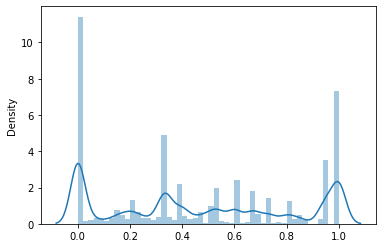

In [102]:
sns.distplot(std_data)

{'whiskers': [<matplotlib.lines.Line2D at 0x2d310567790>,
 'caps': [<matplotlib.lines.Line2D at 0x2d310567eb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2d310567400>,
 'medians': [<matplotlib.lines.Line2D at 0x2d310576610>,
 'fliers': [<matplotlib.lines.Line2D at 0x2d3105769a0>,
 'means': []}

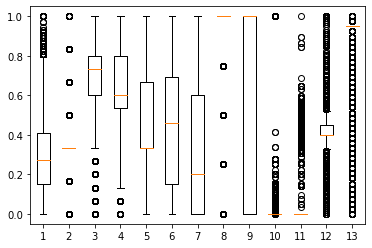

In [114]:
plt.boxplot(std_data)

In [56]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()


In [57]:
classifier.fit(std_data, data.Salary)


GaussianNB()

In [58]:
prediction = classifier.predict(std_data)
prediction

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype='<U6')

In [59]:
from sklearn.metrics import accuracy_score


In [60]:
Accuracy = accuracy_score(prediction, data.Salary)

Accuracy

0.797586286926826

In [61]:
# for Testing data :-

In [62]:
test_data = pd.read_csv("C:\\Users\\hp\\Downloads\\SalaryData_Test.csv")
test_data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [63]:
test_data['workclass'] = label_encoder.fit_transform(test_data.workclass)
test_data['education'] = label_encoder.fit_transform(test_data.education)
test_data['maritalstatus'] = label_encoder.fit_transform(test_data.maritalstatus)
test_data['occupation'] = label_encoder.fit_transform(test_data.occupation)
test_data['relationship'] = label_encoder.fit_transform(test_data.relationship)
test_data['race'] = label_encoder.fit_transform(test_data.race)
test_data['sex'] = label_encoder.fit_transform(test_data.sex)
test_data['native'] = label_encoder.fit_transform(test_data.native)


In [64]:
# make our test data scale free

In [65]:
def std_data(i):
    result = (i-i.min())/(i.max()-i.min())
    return result

In [66]:
std_test_data = std_data(test_data.iloc[:,:-1])

In [67]:
std_test_data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,0.109589,0.333333,0.066667,0.400000,0.666667,0.461538,0.6,0.50,1.0,0.000000,0.0,0.397959,0.948718
1,0.287671,0.333333,0.733333,0.533333,0.333333,0.307692,0.0,1.00,1.0,0.000000,0.0,0.500000,0.948718
2,0.150685,0.166667,0.466667,0.733333,0.333333,0.769231,0.0,1.00,1.0,0.000000,0.0,0.397959,0.948718
3,0.369863,0.333333,1.000000,0.600000,0.333333,0.461538,0.0,0.50,1.0,0.076881,0.0,0.397959,0.948718
4,0.232877,0.333333,0.000000,0.333333,0.666667,0.538462,0.2,1.00,1.0,0.000000,0.0,0.295918,0.948718
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,0.219178,0.333333,0.600000,0.800000,0.666667,0.692308,0.6,1.00,1.0,0.000000,0.0,0.397959,0.948718
15056,0.301370,0.333333,0.600000,0.800000,0.000000,0.692308,0.2,1.00,0.0,0.000000,0.0,0.357143,0.948718
15057,0.287671,0.333333,0.600000,0.800000,0.333333,0.692308,0.0,1.00,1.0,0.000000,0.0,0.500000,0.948718
15058,0.369863,0.333333,0.600000,0.800000,0.000000,0.000000,0.6,0.25,1.0,0.054551,0.0,0.397959,0.948718


In [68]:
test_prediction = classifier.predict(std_test_data)

In [69]:
Accuracy = accuracy_score(test_prediction, test_data.Salary)
Accuracy


0.796812749003984

#### we are getting the accuracy for testing data is 79.68 %.

{'whiskers': [<matplotlib.lines.Line2D at 0x2d30d6caf10>,
 'caps': [<matplotlib.lines.Line2D at 0x2d30d6aa5b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2d30d6caac0>,
 'medians': [<matplotlib.lines.Line2D at 0x2d30d6aacd0>,
 'fliers': [<matplotlib.lines.Line2D at 0x2d30f6d10a0>,
 'means': []}

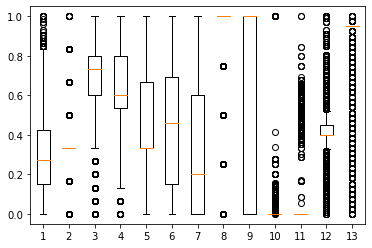

In [70]:
plt.boxplot(std_test_data)

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

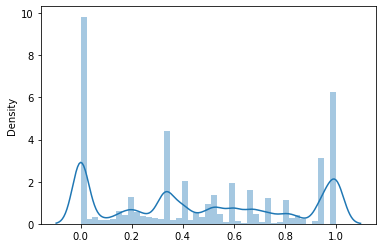

In [73]:
sns.distplot(std_test_data)

In [1]:
std_test_data.plot(kind='kde')

NameError: name 'std_test_data' is not defined

# we are getting the accuracy for testing data is 79.68 %.